In [1]:
import os
import pandas as pd
import seaborn as sns

In [2]:
os.chdir("D:\Projects\LEGO\Rebrickable")
sets = pd.read_csv("sets_all.csv")
sets.head()

,set_num,set_name,year,theme_id,num_parts,rating,price_adjust,pcs_num,price_per_pcs,theme_name,parent_theme
0,"""001""",Gears,1965,1,43,NaN,39.88,43.0,0.93,Technic,Technic
1,"""0011""",Town Mini-Figures,1978,84,12,NaN,NaN,NaN,NaN,Supplemental,Classic Town
2,"""0011""",Castle 2 for 1 Bonus Offer,1987,199,2,5.0,3.35,151.0,0.02,Lion Knights,Castle
3,"""0012""",Space Mini-Figures,1979,143,12,NaN,NaN,NaN,NaN,Supplemental,Space
4,"""0013""",Space Mini-Figures,1979,143,12,NaN,NaN,NaN,NaN,Supplemental,Space


### yearly release

In [3]:
release_set = sets.groupby(["year","set_num"],as_index=False).agg({"set_name":"count"})
release_set["set_re"] = 1

In [4]:
re_set = release_set.groupby("year",as_index=False).agg({"set_num":"count"})

In [5]:
re_set.head()

,year,set_num
0,1949,5
1,1950,6
2,1953,4
3,1954,14
4,1955,28


In [6]:
release_theme = sets.groupby(["year","theme_name"],as_index=False).agg({"set_name":"count"})
release_theme["theme_re"] = 1

In [7]:
re_theme = release_theme.groupby("year",as_index=False).agg({"theme_name":"count"})

In [8]:
re_theme.head()

,year,theme_name
0,1949,2
1,1950,1
2,1953,2
3,1954,2
4,1955,4


In [9]:
import plotly.plotly as py
from plotly.graph_objs import *

In [10]:
import plotly
# get username and key from website
plotly.tools.set_credentials_file(username='twinklenoisland',api_key='Oa8xw34UA63TxUc98XyZ')

In [11]:
trace0 = Scatter(x=re_set["year"],y=re_set["set_num"],
                mode = "lines",
                name = "released sets",
                marker = dict(
                color = '#f2cd37'))
trace1 = Scatter(x=re_theme["year"],y=re_theme["theme_name"],
                mode = "lines",
                name = "released themes",
                marker = dict(
                color = '#c91a09'))

# edit layout
layout = dict(title = 'Sets and themes released every year',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Released number'),
              font = dict(family = 'Arial'))

In [12]:
# compile traces
data = [trace0,trace1]
fig = dict(data=data, layout=layout)
py.iplot(fig,filename='scatter plots')

D:\conda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### yearly parts count in sets

In [13]:
part_set = sets.groupby(["year","set_num"],as_index=False).agg({"num_parts":"sum"})

In [14]:
part_set.head()

,year,set_num,num_parts
0,1949,"""700.1""",142
1,1949,"""700.2""",178
2,1949,"""700.3""",142
3,1949,"""700.A""",24
4,1949,"""700.B""",12


In [15]:
part_set_mean = part_set.groupby("year",as_index=False).agg({"num_parts":"mean"})

In [16]:
part_set_mean.head()

,year,num_parts
0,1949,99.600000
1,1950,1.000000
2,1953,13.500000
3,1954,12.357143
4,1955,36.607143


In [17]:
part_set_median = part_set.groupby("year",as_index=False).agg({"num_parts":"median"})
part_set_median.head()

,year,num_parts
0,1949,142.0
1,1950,1.0
2,1953,3.0
3,1954,5.0
4,1955,20.0


In [18]:
trace0 = Bar(x=re_set["year"],y=re_set["set_num"],
                name = "released sets",
                marker = dict(
                color = '#f2cd37'))
trace1 = Scatter(x=part_set_mean["year"],y=part_set_mean["num_parts"],
                mode = "lines",
                name = "average parts in sets released",
                line = dict(
                color = '#6c6e68',
                dash = 'dot'))
trace2 = Scatter(x=part_set_median["year"],y=part_set_median["num_parts"],
                mode = "lines",
                name = "median parts in sets released",
                line = dict(
                color = '#a0a5a9',
                dash = 'dot'))

# edit layout
layout = dict(title = 'Sets and parts released every year',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Released number'),
              font = dict(family = 'Arial'))

# compile traces
data = [trace0,trace1,trace2]
fig = dict(data=data, layout=layout)
py.iplot(fig,filename='scatter plots2')

D:\conda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Quantile plot

In [19]:
# transfer to decade
def decade(year):
    n = year//10
    decade = str(n)+"0s"
    return decade

part_set["decade"] = part_set["year"].apply(decade)
part_set.head()

,year,set_num,num_parts,decade
0,1949,"""700.1""",142,1940s
1,1949,"""700.2""",178,1940s
2,1949,"""700.3""",142,1940s
3,1949,"""700.A""",24,1940s
4,1949,"""700.B""",12,1940s


In [20]:
df = part_set[part_set.year>=1970]
df.head()

,year,set_num,num_parts,decade
418,1970,"""078""",0,1970s
419,1970,"""1""",67,1970s
420,1970,"""102A""",120,1970s
421,1970,"""104""",1,1970s
422,1970,"""126""",60,1970s


In [21]:
df0 = df[["year","num_parts"]].groupby("year").quantile(.25).reset_index()
df1 = df[["year","num_parts"]].groupby("year").quantile(.5).reset_index()
df2 = df[["year","num_parts"]].groupby("year").quantile(.75).reset_index()
df3 = df[["year","num_parts"]].groupby("year").quantile(.95).reset_index()

In [22]:
df0.head()

0.25,year,num_parts
0,1970,30.00
1,1971,33.00
2,1972,22.25
3,1973,33.00
4,1974,45.00


In [25]:
trace3 = Scatter(x = df0["year"],y=df0["num_parts"],
                    fill= 'tonexty',
                    fillcolor='#de2d26',
                    mode='lines',
                    line=dict(color='#c91a09'),
                   name='25th quantile')
trace2 = Scatter(x = df1["year"],y=df1["num_parts"],
                    fill= 'tonexty',
                    fillcolor='#fb6a4a',
                    mode='lines',
                    line=dict(color='#c91a09'),
                   name = '50th quantile')
trace1 = Scatter(x = df2["year"],y=df2["num_parts"],
                    fill= 'tonexty',
                    fillcolor='#fcae91',
                    mode='lines',
                    line=dict(color='#c91a09'),
                   name = '75th quantile')
trace0 = Scatter(x = df3["year"],y=df3["num_parts"],
                    fill= 'tonexty',
                    fillcolor='#fee5d9',
                    mode='lines',
                    line=dict(color='#c91a09'),
                   name = '95th quantile')

# edit layout
layout = dict(title = "Parts released in quantile",
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Parts number'),
              font = dict(family = 'Arial'))

# compile traces
data = [trace3,trace2,trace1,trace0]
fig = dict(data=data, layout=layout)
py.iplot(fig,filename='plot3')

D:\conda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### color by decades

In [27]:
inv = pd.read_csv("inv_all.csv")
inv.head()

,inventory_id,part_num,color_id,quantity,is_spare,color_name,rgb,is_trans,set_num,set_name,year,theme_id,num_parts,price_adjust,pcs_num,price_per_pcs,theme_name,parent_theme
0,1,48379c01,72,1,f,Dark Bluish Gray,6C6E68,f,"""7922""",McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,NaN,NaN,NaN,Gravity Games,Sports
1,1,48395,7,1,f,Light Gray,9BA19D,f,"""7922""",McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,NaN,NaN,NaN,Gravity Games,Sports
2,1,mcsport6,25,1,f,Orange,FE8A18,f,"""7922""",McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,NaN,NaN,NaN,Gravity Games,Sports
3,1,paddle,0,1,f,Black,05131D,f,"""7922""",McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,NaN,NaN,NaN,Gravity Games,Sports
4,3,11816pr0005,78,1,f,Light Flesh,F6D7B3,f,"""3931""",Emma's Splash Pool,2012,494,43,6.63,43.0,0.15,Friends,Friends


In [28]:
color_y = inv.groupby(["year","color_name","rgb"],as_index=False).agg({"quantity":"count"})

In [29]:
color_y["decade"] = color_y["year"].apply(decade)

In [30]:
color_y.head()

,year,color_name,rgb,quantity,decade
0,1949,Blue,0055BF,16,1940s
1,1949,Bright Green,4B9F4A,1,1940s
2,1949,Green,237841,32,1940s
3,1949,Red,C91A09,35,1940s
4,1949,Vintage Blue,039CBD,4,1940s


In [31]:
color_d = color_y.groupby(["decade","rgb","color_name"]).agg({"quantity":"sum"})
color_d2 = color_d.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
color_d2 = color_d2.reset_index()
color_d2.head()

,decade,rgb,color_name,quantity
0,1940s,0055BF,Blue,9.356725
1,1940s,039CBD,Vintage Blue,2.339181
2,1940s,1E601E,Vintage Green,4.678363
3,1940s,237841,Green,18.713450
4,1940s,4B9F4A,Bright Green,0.584795


In [32]:
color_d2[color_d2.rgb == "0055BF"]

,decade,rgb,color_name,quantity
0,1940s,0055BF,Blue,9.356725
11,1950s,0055BF,Blue,12.680578
35,1960s,0055BF,Blue,15.110765
57,1970s,0055BF,Blue,13.858658
87,1980s,0055BF,Blue,11.092327
136,1990s,0055BF,Blue,7.761359
216,2000s,0055BF,Blue,4.568045
339,2010s,0055BF,Blue,1.871413


In [34]:
# generate 128 traces for each color
c = color_d2.rgb.unique() # color list
def trace(color):
    df = color_d2[color_d2.rgb == color]
    trace = Bar(
        x = df["decade"],
        y = df["quantity"],
        marker = dict(color='#'+color
                ),
        name = df["color_name"].unique()[0])
    return trace

data = [trace(color) for color in c]
layout = Layout(
    title = "Color composition changes in decades",
    barmode='stack',
    xaxis = dict(title = 'Decade'),
    yaxis = dict(title = 'Color composition'),
    font = dict(family = 'Arial'),
    plot_bgcolor = '#e6e6e6'
)

# compile traces
fig = dict(data=data, layout=layout)
py.iplot(fig,filename='plot4')

D:\conda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### top 5 colors in each theme

In [145]:
# City, Duplo, Friends, Disney, Classic, Creator, Ninjago, Stranger Things, Avatar, Harry Potter
color_thm = inv.groupby(["parent_theme","color_name","rgb"],as_index=False).agg({"quantity":"count"})

In [153]:
def top5color(theme):
    df = color_thm[color_thm.parent_theme == theme].sort_values(by='quantity', ascending = False)
    df.rgb = df.rgb.apply(lambda i : "#"+i)
    return df.iloc[:5,1:3]

In [154]:
top5color("City")

,color_name,rgb
1023,Black,#05131D
1082,White,#FFFFFF
1049,Light Bluish Gray,#A0A5A9
1034,Dark Bluish Gray,#6C6E68
1083,Yellow,#F2CD37


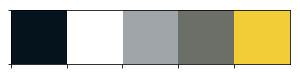

In [155]:
sns.palplot(list(top5color("City")["rgb"]))

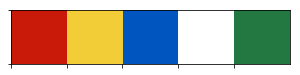

In [156]:
sns.palplot(list(top5color("Duplo")["rgb"]))

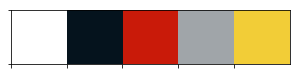

In [159]:
sns.palplot(list(top5color("Classic")["rgb"]))

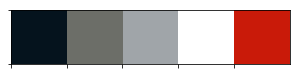

In [161]:
sns.palplot(list(top5color("Ninjago")["rgb"]))

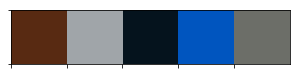

In [162]:
sns.palplot(list(top5color("Stranger Things")["rgb"]))

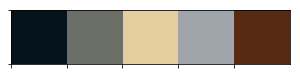

In [164]:
sns.palplot(list(top5color("Harry Potter")["rgb"]))

### Similarity of sets